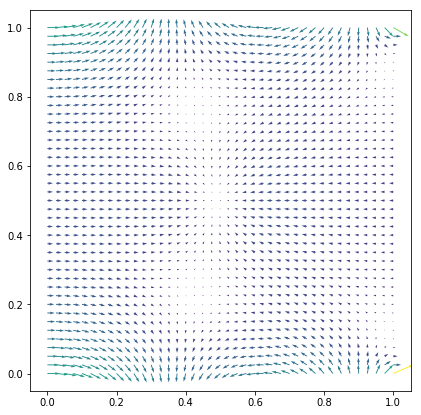

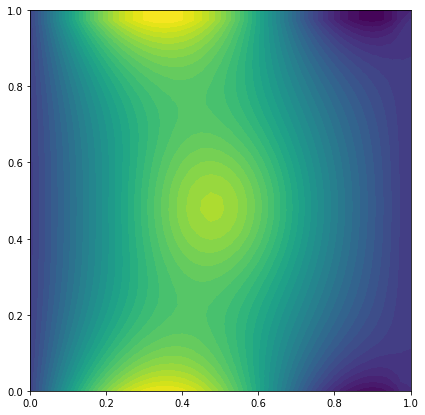

In [43]:
from dolfin import *
import matplotlib.pyplot as plt

def has_pybind11():
    return 1

mesh = UnitSquareMesh(40, 40)

BDM = FiniteElement("BDM", mesh.ufl_cell(), 1)
DG  = FiniteElement("DG", mesh.ufl_cell(), 0)
W = FunctionSpace(mesh, BDM * DG)

(sigma, u) = TrialFunctions(W)
(tau, v) = TestFunctions(W)

f = Expression("10*exp(-(pow(x[0] - 0.5, 2) + pow(x[1] - 0.5, 2)) / 0.02)", degree=2)

a = (dot(sigma, tau) + div(tau)*u + div(sigma)*v)*dx
L = - f*v*dx

class BoundarySource(UserExpression):
    def __init__(self, mesh, **kwargs):
        self.mesh = mesh
        if has_pybind11():
            super().__init__(**kwargs)
    def eval_cell(self, values, x, ufc_cell):
        cell = Cell(self.mesh, ufc_cell.index)
        n = cell.normal(ufc_cell.local_facet)
        g = sin(5*x[0])
        values[0] = g*n[0]
        values[1] = g*n[1]
    def value_shape(self):
        return (2,)

G = BoundarySource(mesh, degree=2)

def boundary(x):
    return x[1] < DOLFIN_EPS or x[1] > 1.0 - DOLFIN_EPS

bc = DirichletBC(W.sub(0), G, boundary)

w = Function(W)
solve(a == L, w, bc)
(sigma, u) = w.split()

# Plot sigma and u
plt.figure(figsize = (7,7))
plot(sigma)

plt.figure(figsize = (7,7))
plot(u)

plt.show()

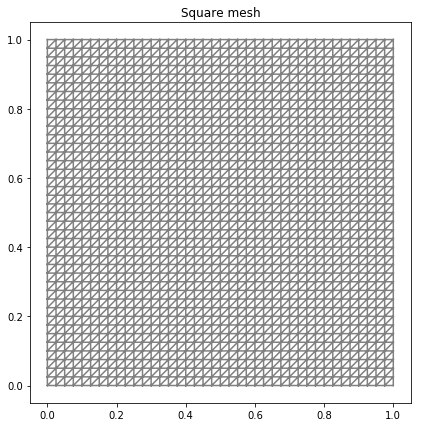

In [45]:
mesh = UnitSquareMesh(40, 40)
plt.figure(figsize = (7,7))
plot(mesh, title="Square mesh")
plt.show()

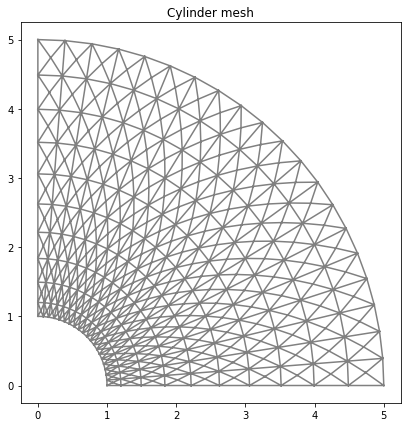

In [41]:
import numpy

Theta = pi/2
a, b = 1, 5.0
nr = 10 # divisions in r direction
nt = 20 # divisions in theta direction
mesh = RectangleMesh(Point(1,0), Point(5,1),nr, nt, "crossed")
     # First make a denser mesh towards r=a
x = mesh.coordinates()[:,0]
y = mesh.coordinates()[:,1]
s = 1.3

def denser(x, y):
    return [a + (b-a)*((x-a)/(b-a))**s, y]

x_bar, y_bar = denser(x, y)
xy_bar_coor = numpy.array([x_bar, y_bar]).transpose() 
mesh.coordinates()[:] = xy_bar_coor

def cylinder(r, s):
    return [r*numpy.cos(Theta*s), r*numpy.sin(Theta*s)]

x_hat, y_hat = cylinder(x_bar, y_bar)
xy_hat_coor = numpy.array([x_hat, y_hat]).transpose() 
mesh.coordinates()[:] = xy_hat_coor
plt.figure(figsize = (7,7))
ax = plot(mesh, title="Cylinder mesh")

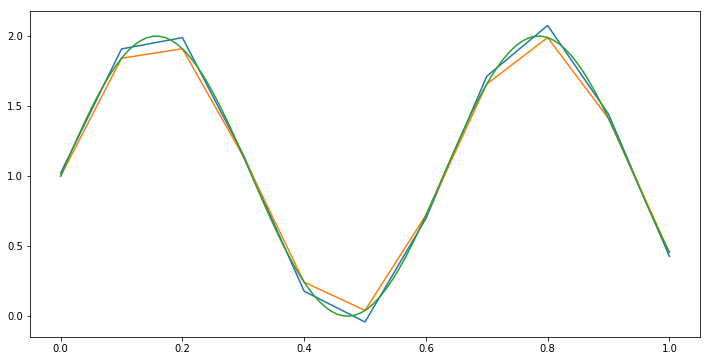

In [159]:
mesh = UnitIntervalMesh(10)
V = FunctionSpace(mesh, "CG", 1)
f = Expression("1 + sin(10*x[0])", degree=5)

# L2 projection
U = Function(V)
v = TestFunction(V)
r = inner(U - f, v)*dx
solve(r == 0, U)

# Comparison to interpolation
If = interpolate(f, V)

# Comparison to analytical
x = numpy.linspace(0, 1, 100)
y = [1 + sin(10 * xi) for xi in x]

plt.figure(figsize = (12,6))
plot(U)
plot(If)
ax = plt.plot(x,y)

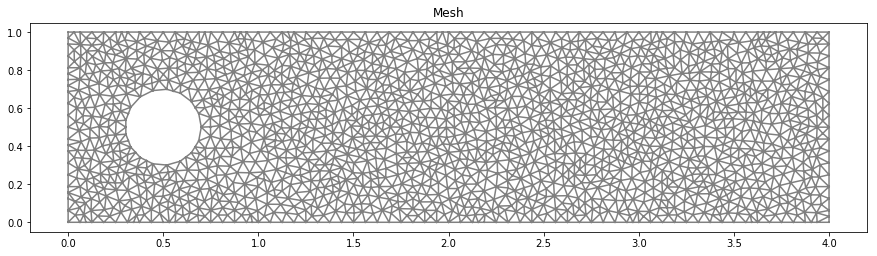

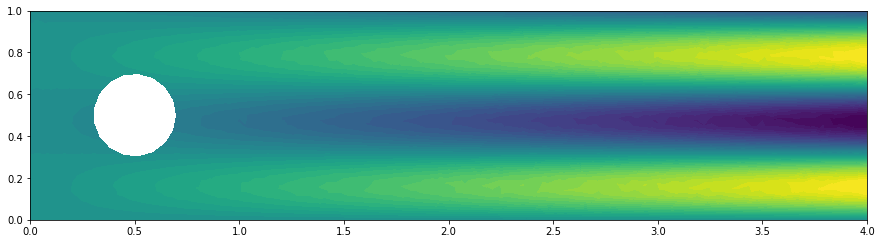

In [238]:
from mshr import *

# Define domain
XMIN, XMAX = 0, 4.; 
YMIN, YMAX = 0, 1.; 
G = [XMIN, XMAX, YMIN, YMAX];
r = 0.2;
x_c, y_c = 0.5, 0.5; 

# Generate domain and mesh
mresolution = 50
domain = Rectangle(Point(G[0], G[2]), Point(G[1], G[3])) - Circle(Point(x_c, y_c), r)
mesh = generate_mesh(domain, mresolution)

# Visualize the mesh
plt.figure(figsize = (15,7))
ax = plot(mesh, title="Mesh")

V = FunctionSpace(mesh, "CG", p_order)
u = Expression("1 + x[0]*sin(10*x[1])", degree=5)
Iu = interpolate(u, V)
Pu = project(u, V)
plt.figure(figsize = (15,7))
ax = plot(Pu)

In [222]:
eps = 1e-5
mk = Expression("pow((x[0] - 0.5),2) + pow((x[1] - 0.5),2) < r + eps ? 1. : 0.", r=r, eps=eps, domain=mesh, degree=3)
l = assemble(mk*ds)
one = Expression('1.0',domain=mesh, degree=3);
A = assemble(one*dx) 
[l, A]

[1.2494967211526782, 3.877177833496367]

In [244]:
a, b = 0, 1
mresolution = 30
mesh = IntervalMesh(mresolution, a, b)
p_order = 1;
V = FunctionSpace(mesh, "CG", p_order)
# Extract vertices of the mesh 
x = V.tabulate_dof_coordinates()
x = x.reshape(x.size)
indices = numpy.argsort(x, axis = 0)
indices = indices.reshape(indices.size)

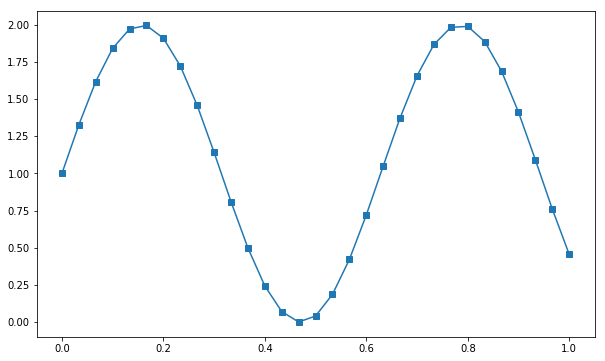

In [245]:
Eu = Function(V)
Eua = numpy.asarray(Eu.vector())
Eua = Eua.reshape(Eua.size)

# Evaluate function in the mesh nodes
for j in indices:
  Eua[j] = 1 + sin(10*x[j])

plt.figure(figsize = (10,6))
plt.plot(x, Eua,'-s');

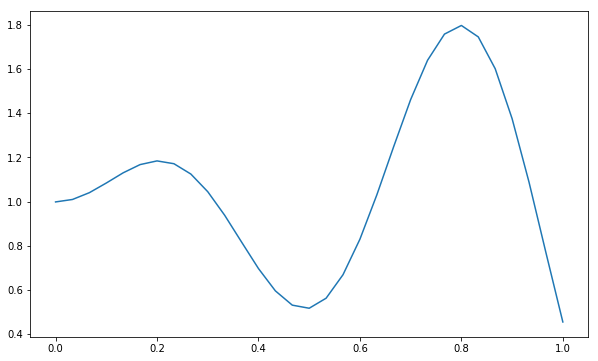

In [246]:
u = Expression("1 + x[0]*sin(10*x[0])", degree=5)
# Interpolate u onto V and extract the values in the mesh nodes
Iu = interpolate(u, V)
# Project u onto V
Pu = project(u, V)
plt.figure(figsize = (10,6))
plot(Pu)

In [249]:
u0 = Pu
assemble(u0*dx) 

1.0784669417542254

In [206]:
indices.size

21

In [193]:
1 + sin(10*x[indices[0][0]][0])

1.0

In [195]:
indices[1][0]

19

In [179]:
numpy.asarray(Eu.vector())

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])